In [3]:
import numpy as np, numpy.random, scipy.stats
import random
import matplotlib.pyplot as plt,time
np.random.seed(1)
from IPython import display
%matplotlib inline

In [11]:
def logposterior(inp):
    #test posterior
    x, y = inp
    val = ( 0.5*scipy.stats.norm.pdf(x,0,1) *
            scipy.stats.norm.pdf(y,0,2) +
            0.5*scipy.stats.norm.pdf(x - y, 0, 2) *
            scipy.stats.norm.pdf(x + y, 6, 0.1))
    return np.log(val)


def show_posterior():
    #shows the log(posterior)
    xgrid, ygrid = np.mgrid[-10:10:.05,-10:10:.05];
    plt.clf()
    logp=[]
    #for x,y in zip(xgrid.flatten(),ygrid.flatten()):
    #logp.append(logposterior([x,y]))
    logp = logposterior([xgrid.flatten(),ygrid.flatten()])
    logp = (logp).reshape(xgrid.shape)
    plt.imshow((logp),
        extent=(-10,10,-10,10),cmap='viridis',origin='lower')
    plt.colorbar()

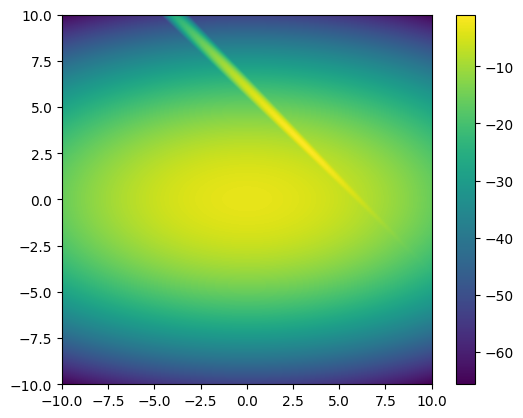

In [5]:
show_posterior()

In [6]:
def domcmc(func, p0, cov, npoints, doplot=True):
    # arguments:
    # func -- log(posterior)
    # p0 -- starting point
    # cov -- the covariance matrix of the proposal distribution
    # npoints the number of points that we want

    samples = []
    oldval = func(p0)

    # evaluate the function at the starting point
    curp = p0

    while len(samples) < npoints:
        #iterate till we have enough points

        newp = np.random.multivariate_normal(curp , cov)
        #generate new proposal point
        newval = func(newp)
        #new function value

        accept = False
        #if new function value is better, accept it
        if newval >= oldval:
            accept = True

        #if new function is worse, accept it with certain
        #probability
        if newval < oldval:
            rand = np.random.rand()
            # log is needed because our function returns log-likehoods!
            if np.log(rand) < newval - oldval:
                accept = True

        if accept:
            # move the point
            curp = newp
            oldval = newval
        # add the point to the chain
        samples.append(curp)

        if doplot:
            plotter(curp, accept)
    samples = np.array(samples)
    #return the samples from the function
    return samples

In [1]:
def run_mcmcfit(npoints=20000, doplot=True):
    np.random.seed(1)
    p0= [-10,10] # starting point

    cov0 = np.array([[1,0],[0,1]])
    #cov0 = np.array([[.01,0],[0,.01]])
    #cov0 = np.array([[100,0],[0,100]])
    # covariance matrix for the proposal
    # Gaussian distribution

    show_posterior()
    plt.xlim(-15,15)
    plt.ylim(-15,15)
    res = domcmc(logposterior, p0, cov0,
        npoints, doplot=doplot)
    return res

In [2]:
def plotter(x, acc):
    if random.random()>0.1:
        return
    display.clear_output(wait=True)
    if acc:
        plt.plot([x[0]],[x[1]],'ko')
    else:
        plt.plot([x[0]],[x[1]],'k.')
    #plt.draw()
    #plt.pause(0.001)
    display.display(plt.gcf())
    #time.sleep(.001)


def show_posterior_samples(samples):
    # shows the histogram of the samples
    plt.hist2d(samples[:,0], samples[:,1],bins=[100,100])

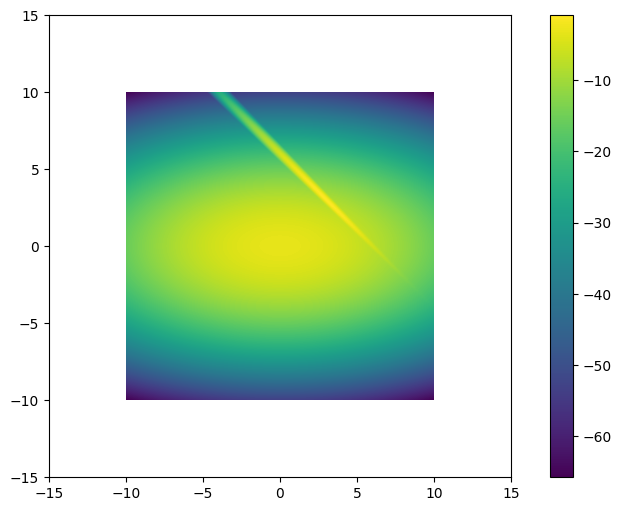

In [9]:
plt.rcParams['figure.figsize'] = (10, 6);
ret = run_mcmcfit(doplot=False)

Now let's look at the distribution of generated  samples
and check they match the original distribution

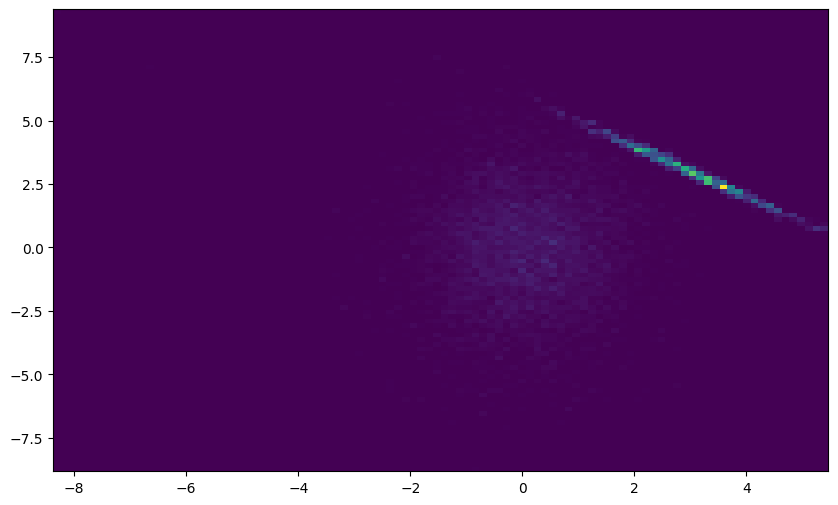

In [12]:
show_posterior_samples(ret)

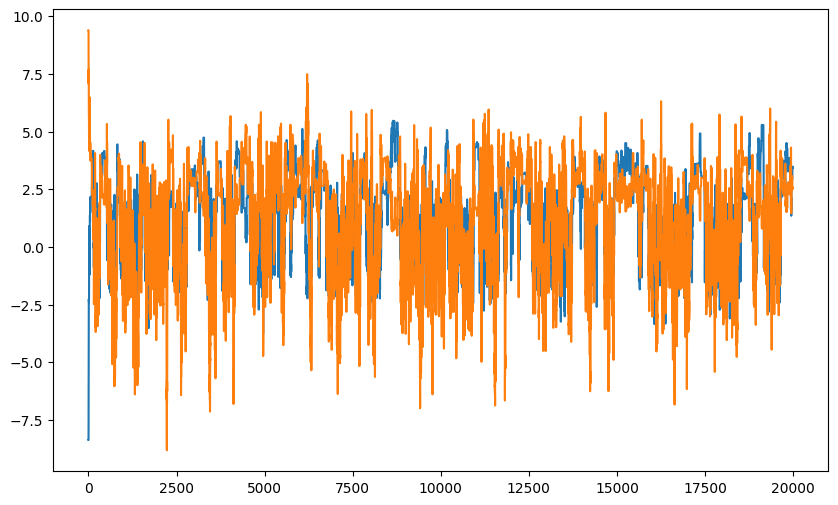

In [14]:
# Traces of each sample

plt.plot(ret[:,0]);plt.plot(ret[:,1])